# Neural Nets with Keras
## Neural Net on an imbalanced Classification for Credit Card Fraud Detection
### Code von https://keras.io/examples/structured_data/imbalanced_classification/

### 1. Vectorize CSV data into numpy array

In [1]:
# Imports

import matplotlib.pyplot as plt
import csv
import numpy as np
from datetime import datetime
import os

fname = 'creditcard.csv'
OUTPUT_DIR = 'models'




In [2]:
all_features = []
all_targets = []
with open(fname) as f:
    for i, line in enumerate(f):
        if i == 0:
            print('HEADER:', line.strip())
            continue  # Skip header
        fields = line.strip().split(',')
        all_features.append([float(v.replace('"','')) for v in fields[:-1]])
        all_targets.append([int(fields[-1].replace('"', ""))])
        if i == 1:
            print('EXAMPLE FEATURES:', all_features[-1])

features = np.array(all_features, dtype='float32')
targets = np.array(all_targets, dtype = "uint8")
print("features.shape:", features.shape)
print("targets.shape:", targets.shape)

HEADER: "Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"
EXAMPLE FEATURES: [0.0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62]
features.shape: (284807, 30)
targets.shape: (284807, 1)


### 2. Prepare a validation set

In [3]:
num_val_samples = int(len(features) * 0.2)
train_features = features [:-num_val_samples]
train_targets = targets [:-num_val_samples]
val_features = features[-num_val_samples:]
val_targets = targets[-num_val_samples:]

### 3. Calculate Class Imbalance

In [4]:
counts = np.bincount(train_targets[:,0])
print(
    'Number of positive samples in training data: {} ({:.3f}% of total)'.format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weights_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 417 (0.183% of total)


### 4. Normalize the data using training set statistics

In [5]:
mean = np.mean(train_features, axis = 0)
train_features -= mean
val_features -= mean
std = np.std(train_features,axis = 0)
train_features /= std
val_features /= std

### 5. Build a binary classification model

In [6]:
import tensorflow as tf

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            256, activation='relu', input_shape=(train_features.shape[-1],)
        ),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation = 'sigmoid')]
        
)
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                         

2022-10-23 13:13:29.311455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-23 13:13:29.311558: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 6. Train the model with *class_weight* argument

Start_Time (Y/M/D-H/M/S): 22/10/23 - 13:28:04
Epoch 1/30


2022-10-23 13:28:05.092724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


112/112 [==============================] - ETA: 0s - loss: 6.4727e-08 - fn: 0.0000e+00 - fp: 828.0000 - tn: 226601.0000 - tp: 417.0000 - precision: 0.3349 - recall: 1.0000

2022-10-23 13:28:07.680593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


112/112 [==============================] - 3s 25ms/step - loss: 6.4727e-08 - fn: 0.0000e+00 - fp: 828.0000 - tn: 226601.0000 - tp: 417.0000 - precision: 0.3349 - recall: 1.0000 - val_loss: 0.0080 - val_fn: 12.0000 - val_fp: 79.0000 - val_tn: 56807.0000 - val_tp: 63.0000 - val_precision: 0.4437 - val_recall: 0.8400
Epoch 2/30
112/112 [==============================] - 2s 21ms/step - loss: 8.1900e-08 - fn: 2.0000 - fp: 821.0000 - tn: 226608.0000 - tp: 415.0000 - precision: 0.3358 - recall: 0.9952 - val_loss: 0.0079 - val_fn: 12.0000 - val_fp: 78.0000 - val_tn: 56808.0000 - val_tp: 63.0000 - val_precision: 0.4468 - val_recall: 0.8400
Epoch 3/30
112/112 [==============================] - 2s 21ms/step - loss: 5.8388e-08 - fn: 0.0000e+00 - fp: 793.0000 - tn: 226636.0000 - tp: 417.0000 - precision: 0.3446 - recall: 1.0000 - val_loss: 0.0077 - val_fn: 12.0000 - val_fp: 69.0000 - val_tn: 56817.0000 - val_tp: 63.0000 - val_precision: 0.4773 - val_recall: 0.8400
Epoch 4/30
112/112 [==============

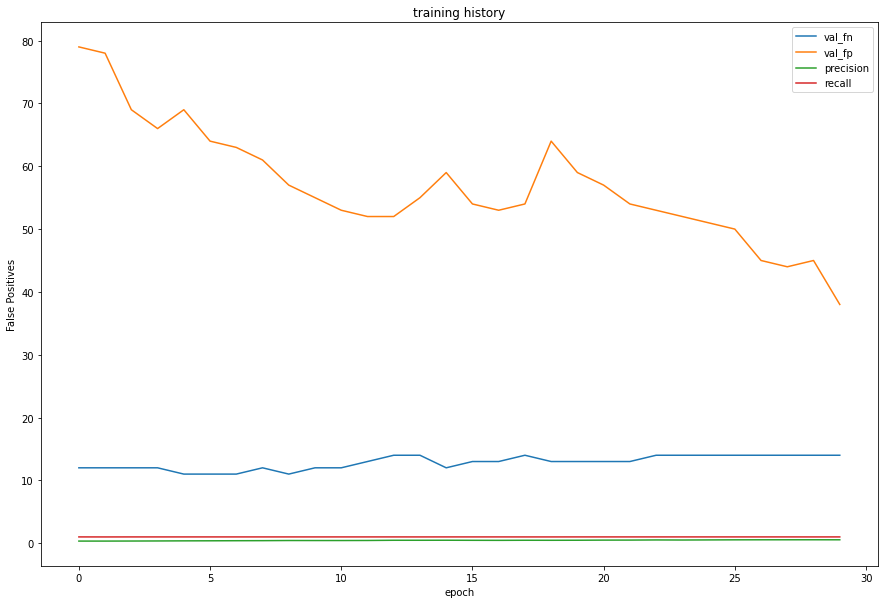

In [11]:
metrics1 = [
    tf.keras.metrics.FalseNegatives(name='fn'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

metrics2 = [
    tf.keras.metrics.AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False,
)
]

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3), loss ='binary_crossentropy', metrics=metrics1
)

START_TIME = datetime.now().strftime("%y%m%d-%H%M")
print('Start_Time (Y/M/D-H/M/S): {}'.format(datetime.now().strftime("%y/%m/%d - %H:%M:%S")))
OUTPUT_PATH = os.path.join(OUTPUT_DIR, START_TIME)
CHECKPOINT_DIR = os.path.join(OUTPUT_PATH, "Epoch-Checkpoints")
MODEL_DIR = os.path.join(OUTPUT_PATH, "Best-Epoch")

callbacks = [tf.keras.callbacks.ModelCheckpoint('modelcheckpoints/fraud_model_epoch{epoch}.h5')]
class_weight = {0: weights_for_0*1.05, 1: weight_for_1*0.95}

history = model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=30,
    verbose=1,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

model.save(OUTPUT_PATH + ".h5", save_format="h5")

plt.figure(figsize=(15, 10))
plt.title('training history')
plt.plot(history.history["val_fn"], label='val_fn')
plt.plot(history.history["val_fp"], label='val_fp')
plt.plot(history.history["precision"], label='precision')
plt.plot(history.history["recall"], label='recall')
plt.xlabel("epoch")
plt.ylabel("False Positives")
# plt.legend(["fn", "fp", "precision", "recall"], loc="upper left")
plt.legend()
plt.savefig(OUTPUT_PATH + ".jpg", bbox_inches='tight')

# plt.figure(figsize=(15, 10))
# plt.title("Training History")
# plt.plot(history.history["precision"])
# plt.plot(history.history["recall"])
# plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
# plt.xlabel("epoch")
# plt.ylabel("accuracy/loss")
# plt.legend(["precision", "recall", "loss", "val_loss"], loc="upper left")
# plt.savefig(OUTPUT_PATH + ".png")